In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("HeartDisease.csv")
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

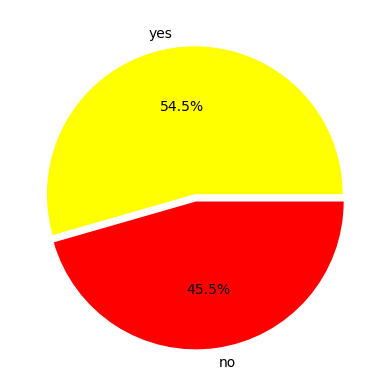

In [8]:
import plotly.graph_objects as go

explode=[.0,.05]
labels = ['yes', 'no']
mycolors=['yellow','red']
sizes= data['target'].value_counts().values
plt.pie(sizes,explode=explode,labels=labels,colors=mycolors,autopct='%1.1f%%')
plt.show()

from above this pie chart we can say 54.5% have heart disease and 45.5% has no heart disease 

In [9]:
# let's check the numerical data
data_num = data.select_dtypes(include = np.number) # selecting colomns only numerical datadata
data_num

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


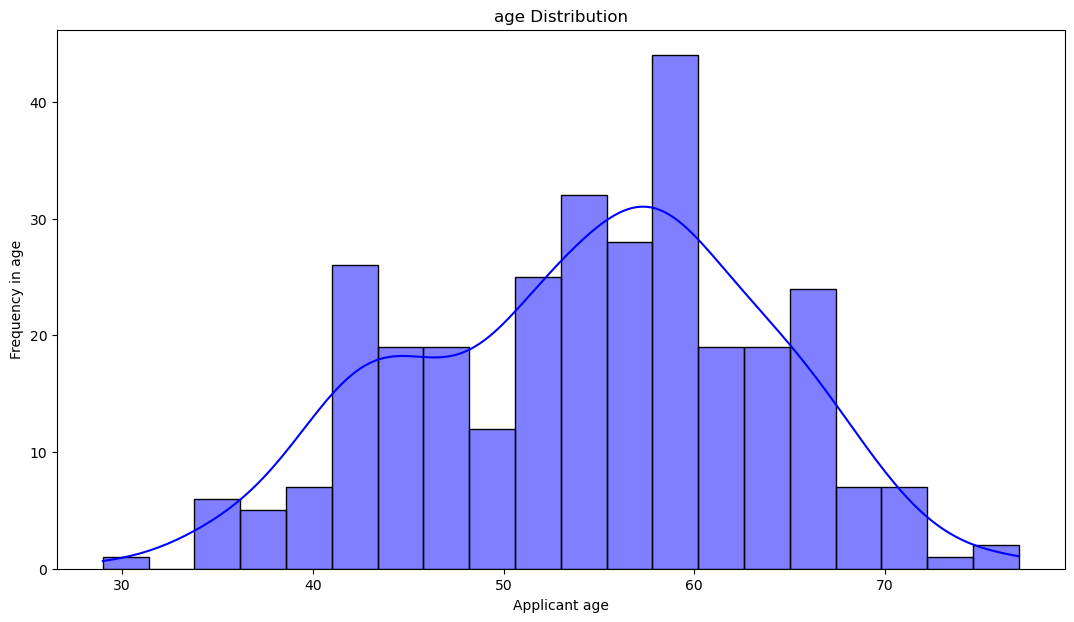

In [10]:
# age distribtion 
plt.figure(figsize=(13,7))
sns.histplot(data.age,bins = 20, kde = True, color = 'blue')

plt.title('age Distribution')
plt.xlabel('Applicant age')
plt.ylabel('Frequency in age')
plt.show()

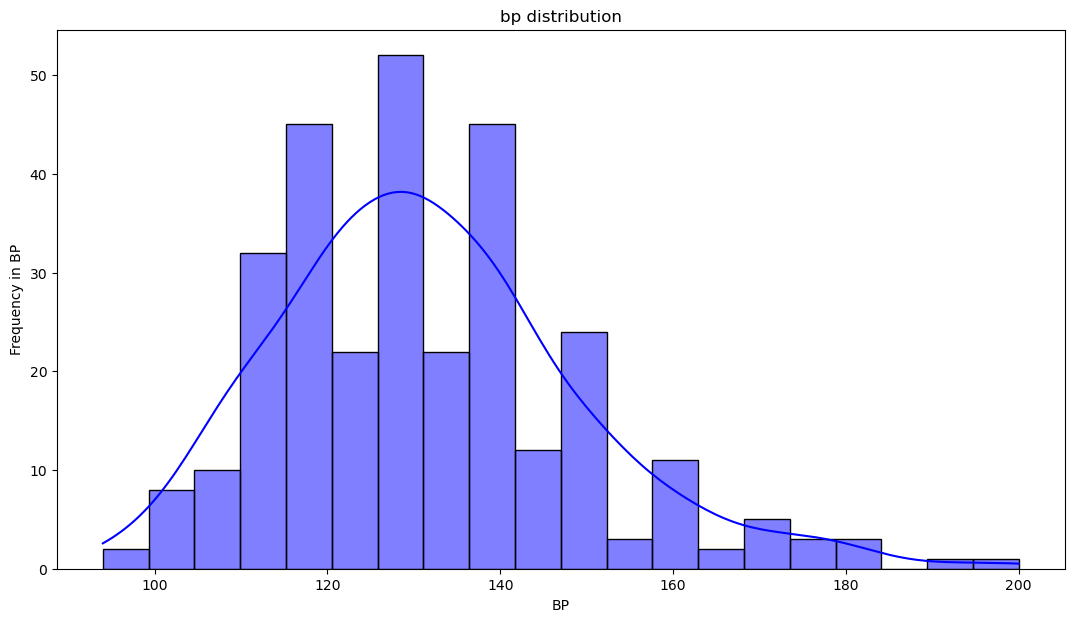

In [12]:
#  distribtion of rest_bps 
plt.figure(figsize=(13,7))
sns.histplot(data.rest_bps,bins = 20, kde = True, color = 'blue')

plt.title('bp distribution')
plt.xlabel('BP')
plt.ylabel('Frequency in BP')
plt.show()

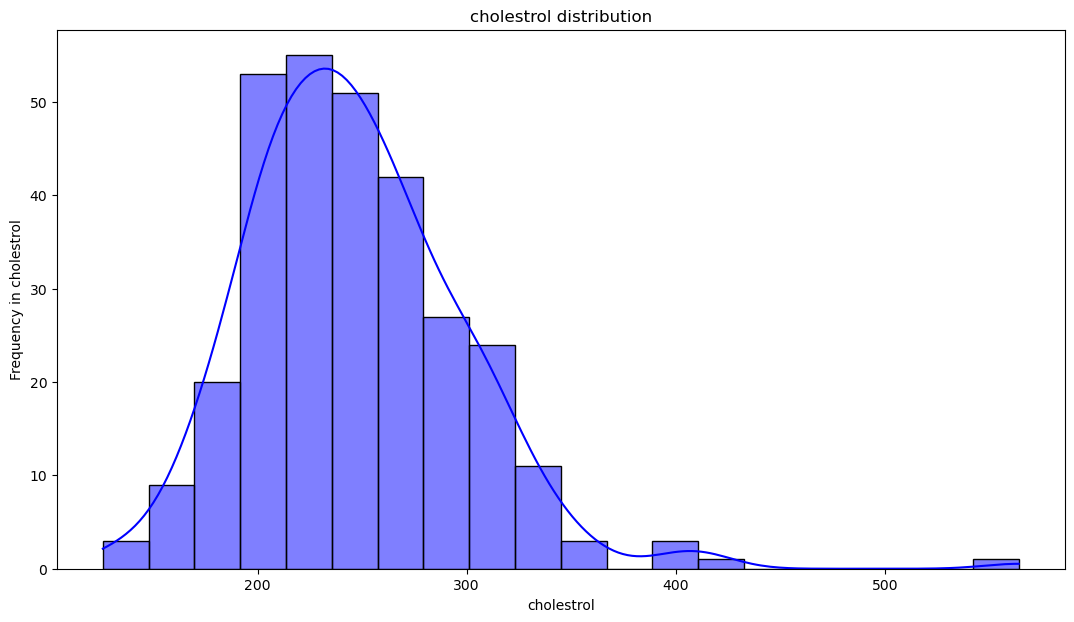

In [13]:
#  distribtion of cholestrol
plt.figure(figsize=(13,7))
sns.histplot(data.cholestrol,bins = 20, kde = True, color = 'blue')

plt.title('cholestrol distribution')
plt.xlabel('cholestrol')
plt.ylabel('Frequency in cholestrol')
plt.show()

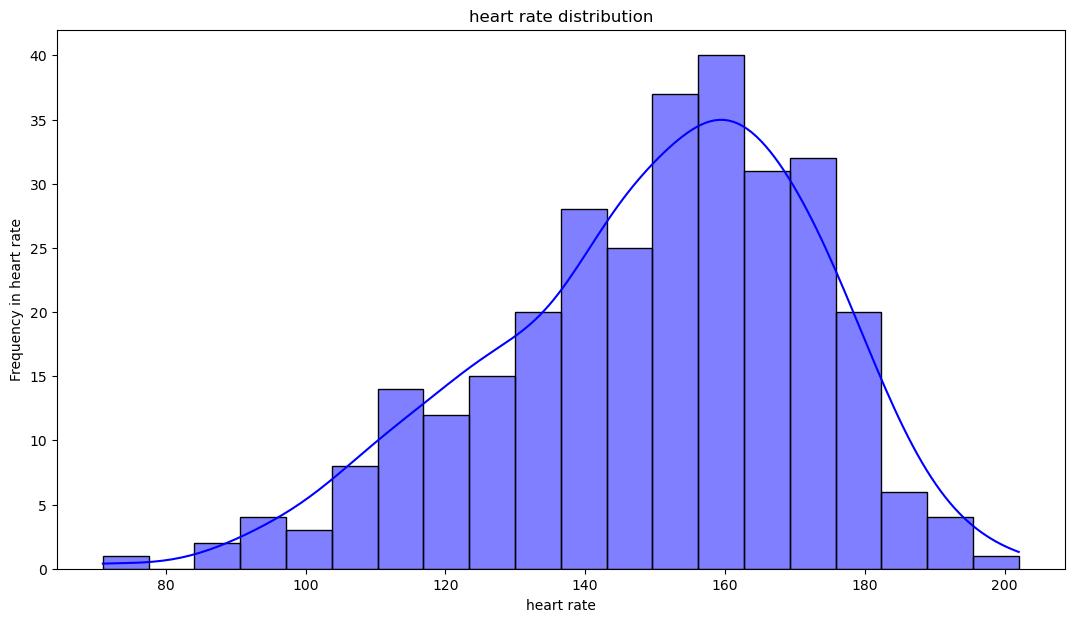

In [15]:
plt.figure(figsize=(13,7))
sns.histplot(data.thalach,bins = 20, kde = True, color = 'blue')

plt.title('heart rate distribution')
plt.xlabel('heart rate')
plt.ylabel('Frequency in heart rate')
plt.show()

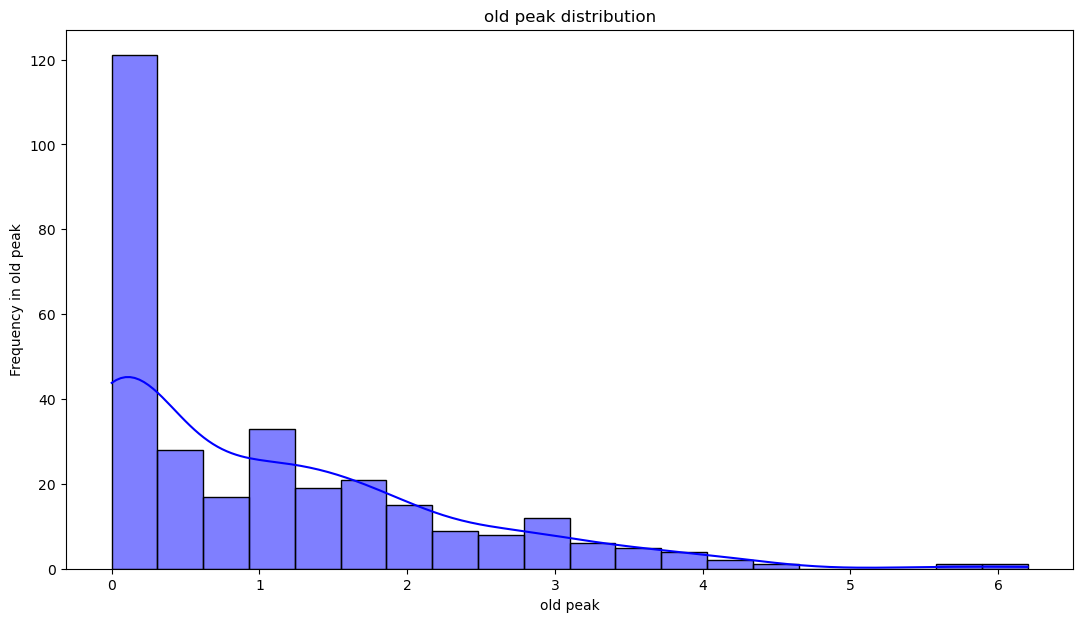

In [16]:
# distribution of old_peak
plt.figure(figsize=(13,7))
sns.histplot(data.old_peak,bins = 20, kde = True, color = 'blue')

plt.title('old peak distribution')
plt.xlabel('old peak')
plt.ylabel('Frequency in old peak')
plt.show()

In [20]:
data_num.drop(["gender","chest_pain","fasting_blood_sugar","rest_ecg","exer_angina","slope","ca","thalassemia"], axis = 1,inplace = True)

In [21]:
data_num.head()

,age,rest_bps,cholestrol,thalach,old_peak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


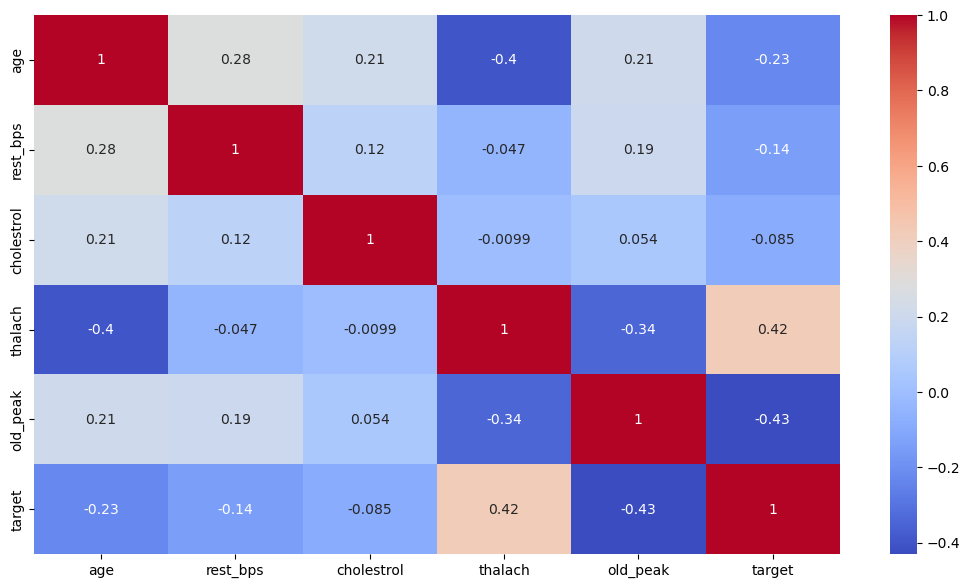

In [22]:
# analysing the relation between numerical columns 
plt.figure(figsize =(13,7))
sns.heatmap(data_num.corr(), annot = True,cmap = "coolwarm")
plt.show()

In [24]:
# identifying the categorical data
data_cat =["gender","chest_pain","fasting_blood_sugar","rest_ecg","exer_angina","slope","ca","thalassemia"]
data_cat

['gender',
 'chest_pain',
 'fasting_blood_sugar',
 'rest_ecg',
 'exer_angina',
 'slope',
 'ca',
 'thalassemia']

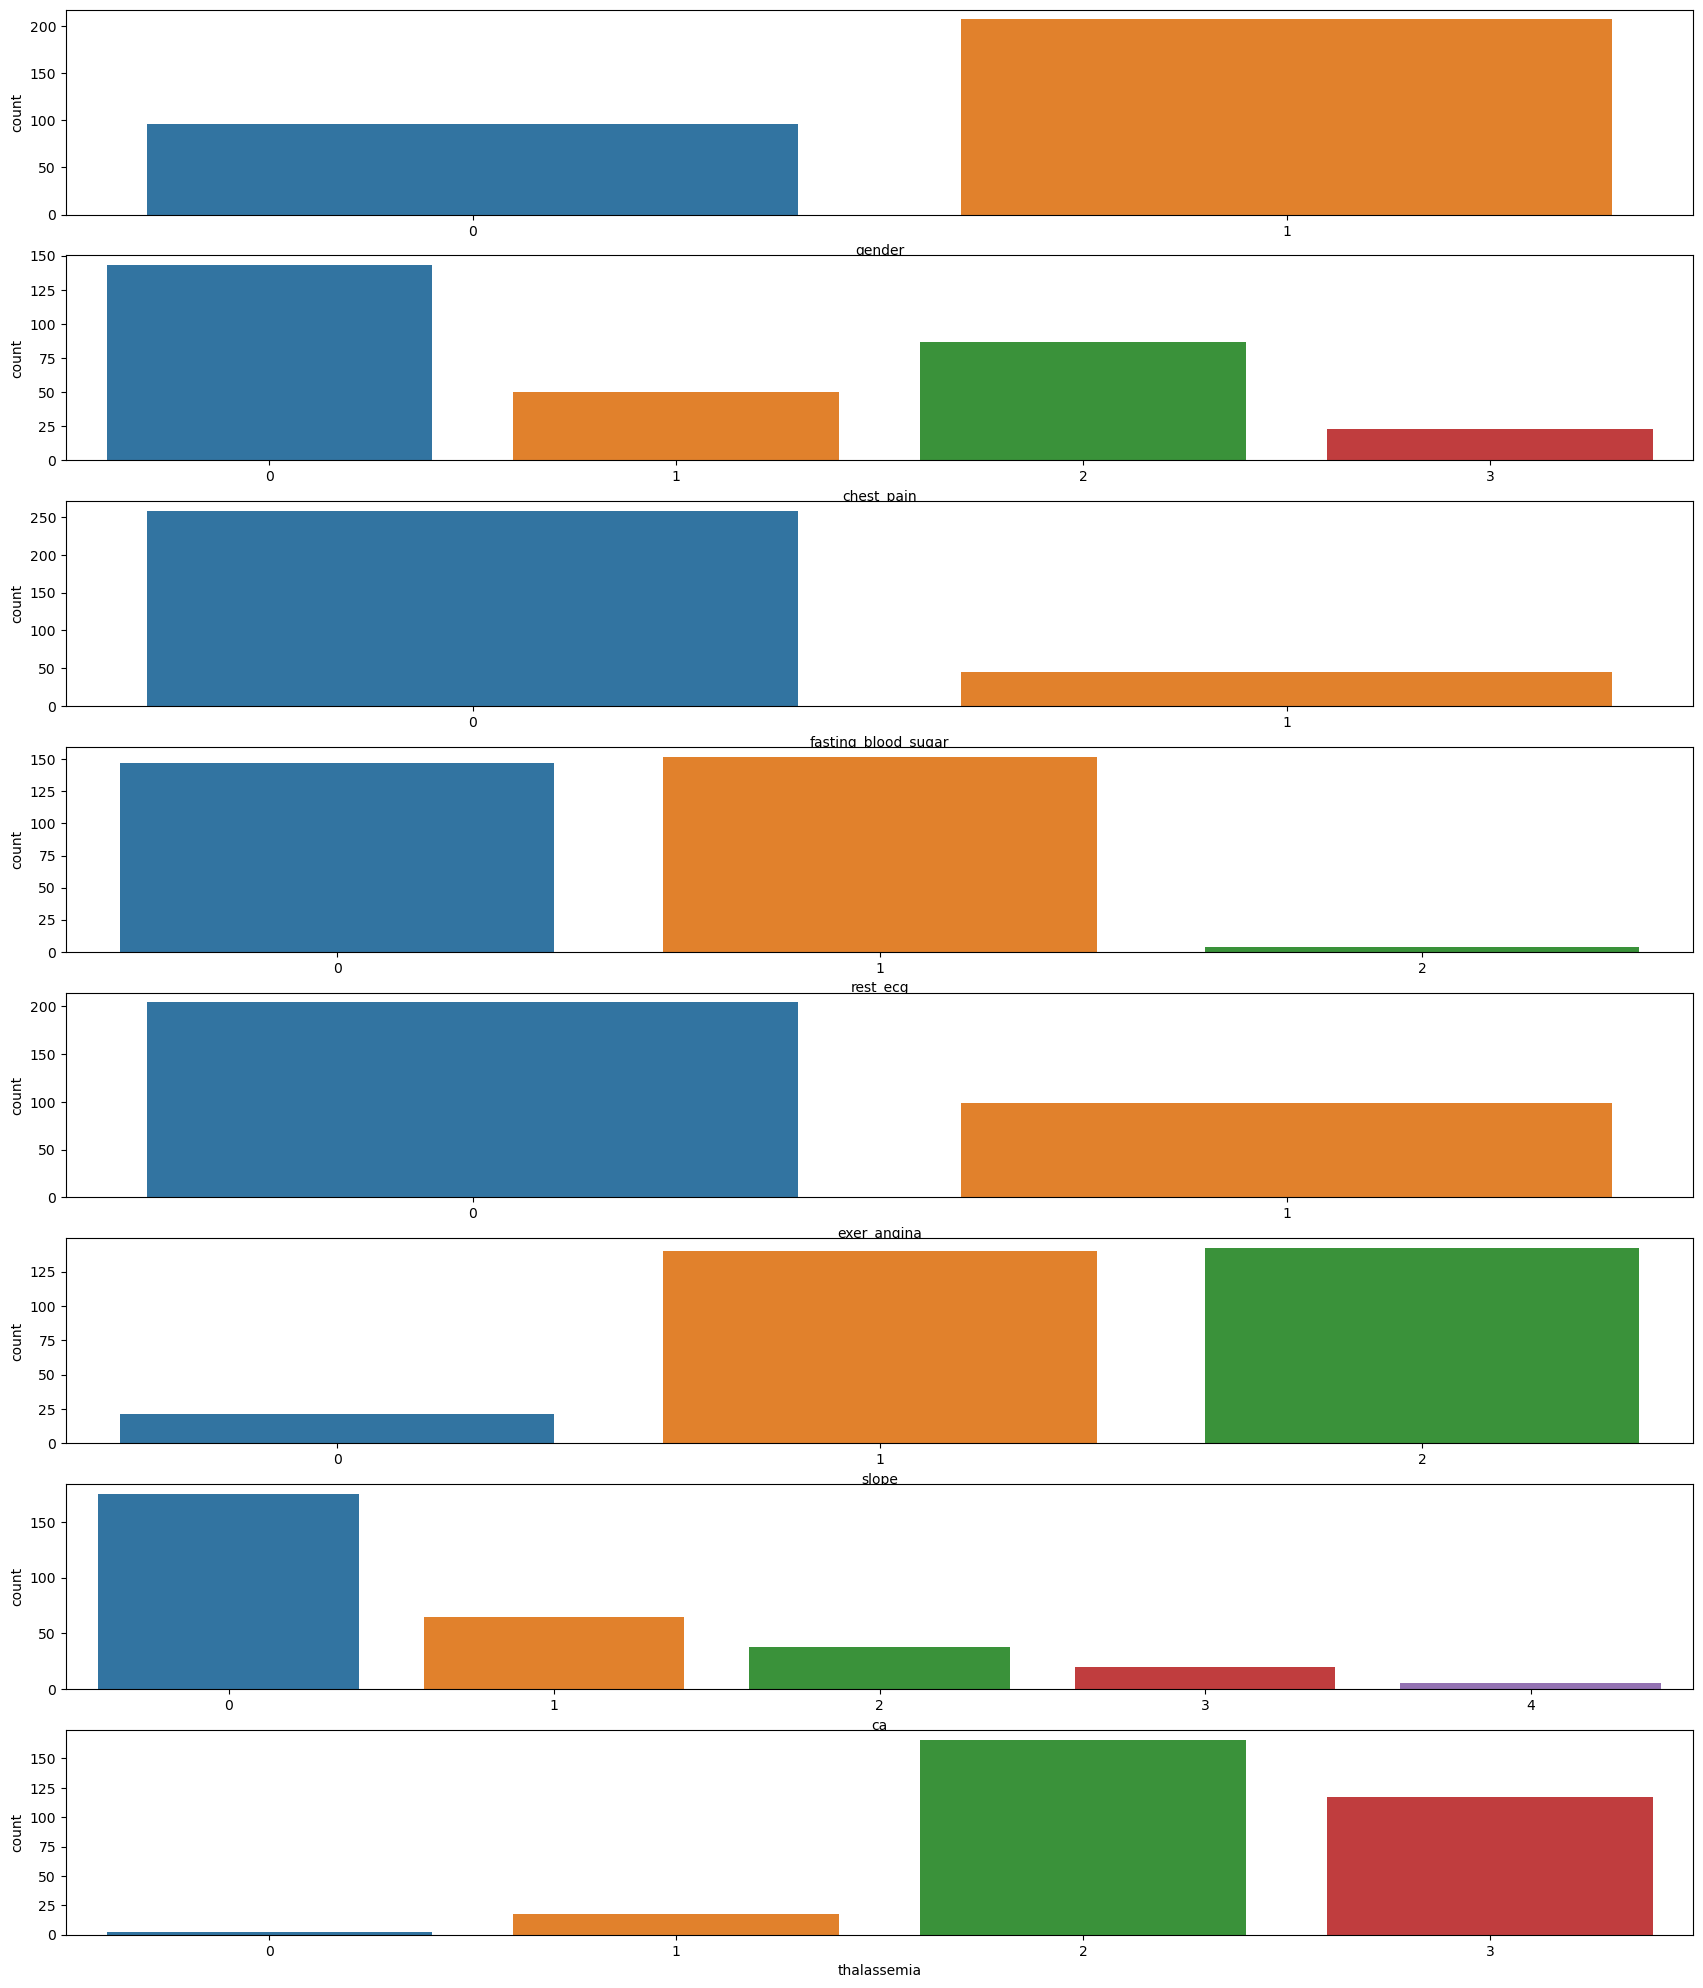

In [26]:
fig, ax = plt.subplots(8,1,figsize = (21,25))
cols = ["gender","chest_pain","fasting_blood_sugar","rest_ecg","exer_angina","slope","ca","thalassemia"]
for i, val in enumerate(cols):
    sns.countplot(x = val,data=data,ax = ax[i])

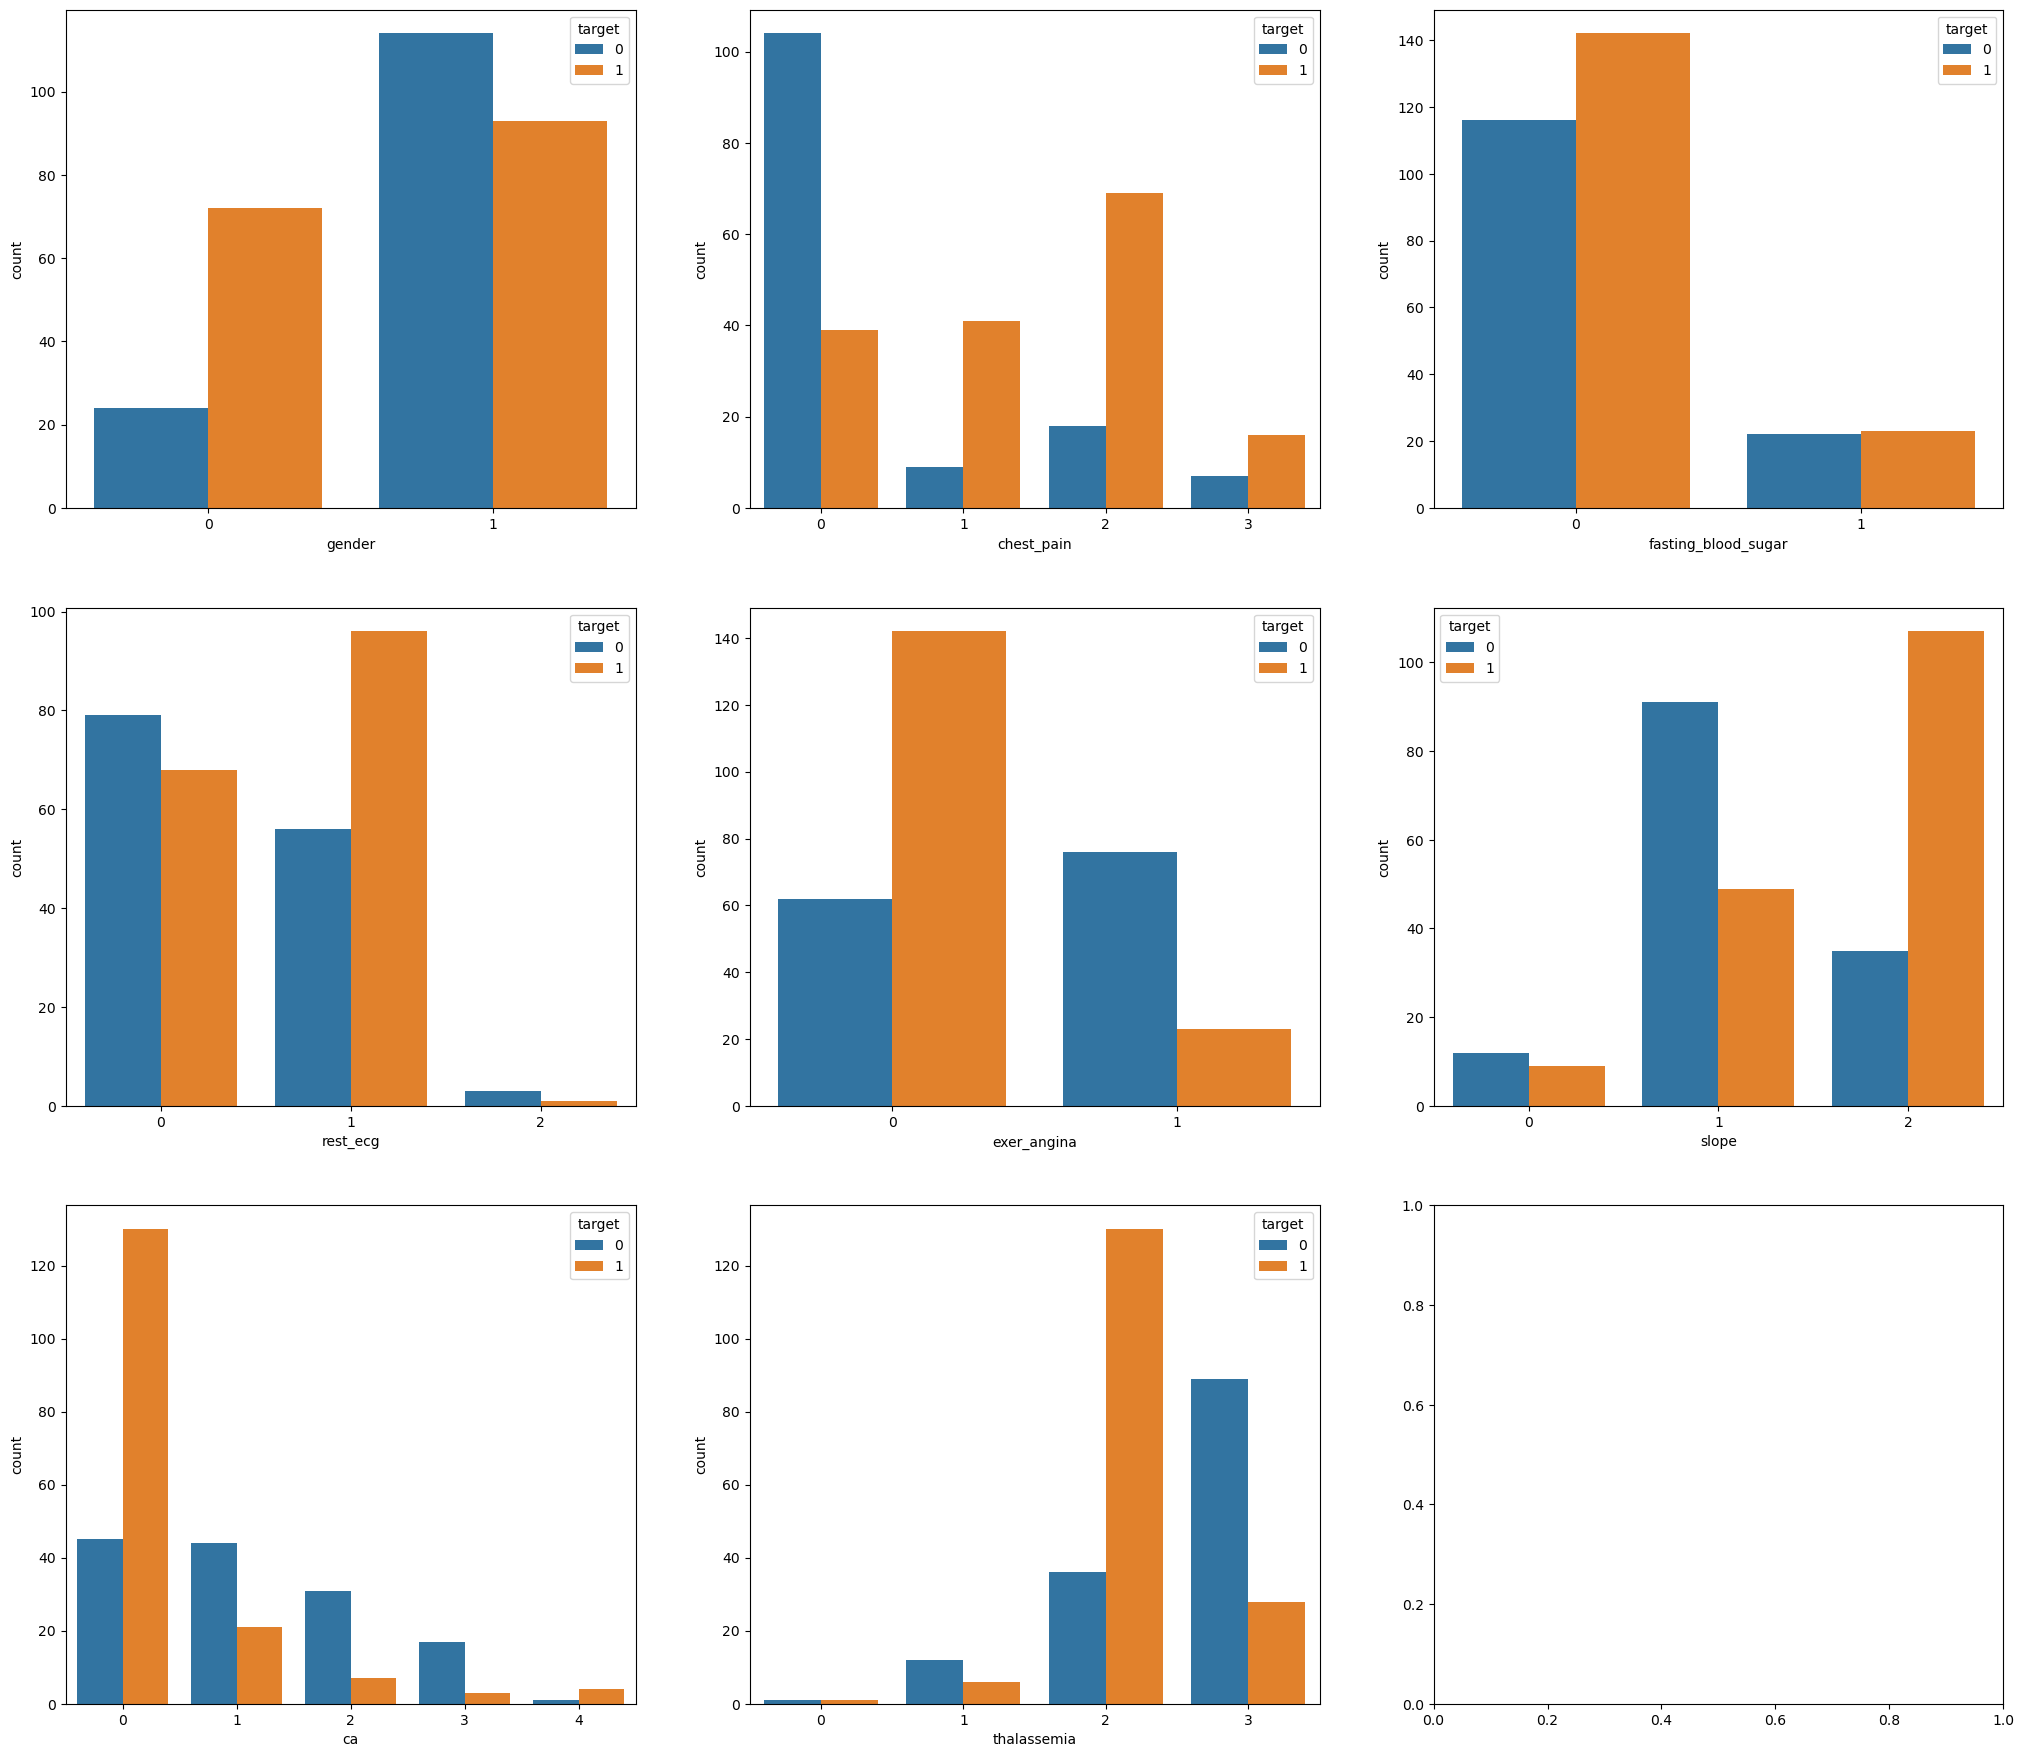

In [31]:
fig, ax = plt.subplots(3,3, figsize =(25,22))

sns.countplot(x ="gender",hue ="target",data=data,ax=ax[0][0])
sns.countplot(x ="chest_pain",hue ="target",data=data,ax=ax[0][1])
sns.countplot(x ="fasting_blood_sugar",hue ="target",data=data,ax=ax[0][2])
sns.countplot(x ="rest_ecg",hue ="target",data=data,ax=ax[1][0])
sns.countplot(x ="exer_angina",hue ="target",data=data,ax=ax[1][1])
sns.countplot(x ="slope",hue ="target",data=data,ax=ax[1][2])
sns.countplot(x ="ca",hue ="target",data=data,ax=ax[2][0])
sns.countplot(x ="thalassemia",hue ="target",data=data,ax=ax[2][1])
plt.show()

In [32]:
# Feature Engineering

In [33]:
## checking the missing values 
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [35]:
# detecting the outliers in (numerical data ) Features

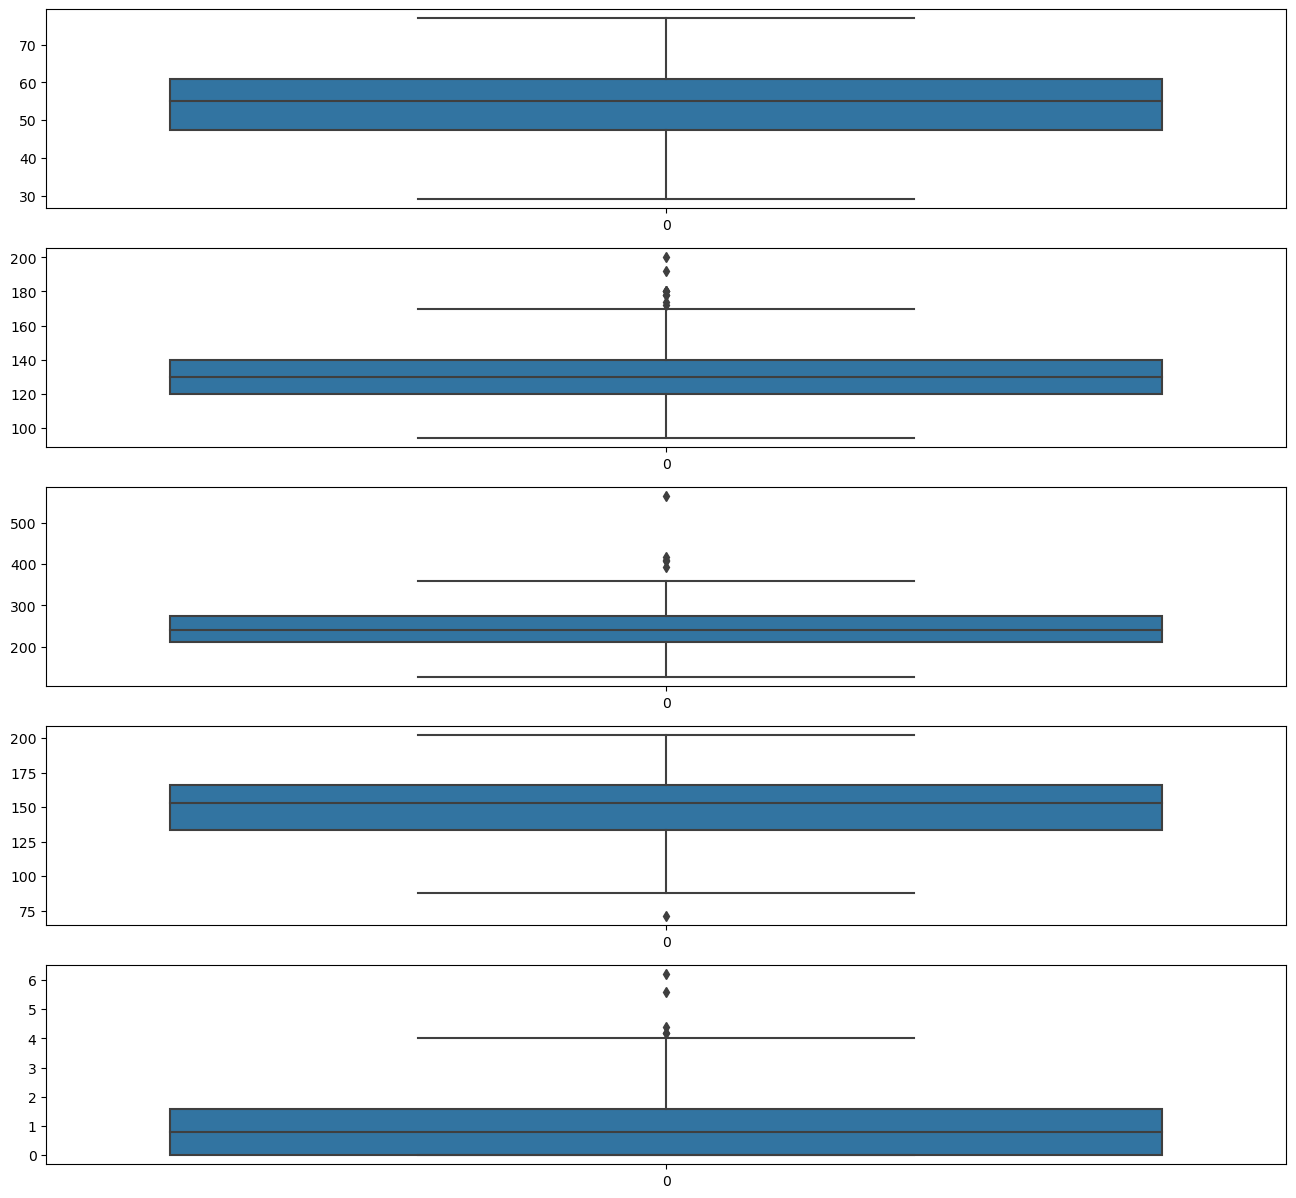

In [37]:
fig, axs = plt.subplots(5,1, figsize =(16,15))

plt1 = sns.boxplot(data["age"],ax =axs[0])
plt1 = sns.boxplot(data["rest_bps"],ax =axs[1])
plt1 = sns.boxplot(data["cholestrol"],ax =axs[2])
plt1 = sns.boxplot(data["thalach"],ax =axs[3])
plt1 = sns.boxplot(data["old_peak"],ax =axs[4])


plt.show()